<h1 color=#009d71> EDA </h1>

In [455]:
#Import the packages
import pickle
import json
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from joblib import dump
import statsmodels.api as sm
import statsmodels.formula.api as smf
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.utils import class_weight
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, 
                             precision_score,
                             recall_score, 
                             f1_score, 
                             roc_auc_score, 
                             confusion_matrix,
                             classification_report,
                            roc_curve,)





In [456]:
with open("../Data/MLA_100k.jsonlines") as jsonfile:
    line = jsonfile.readline()
    print(line)
    #show the file structure data

{"seller_address": {"comment": "", "longitude": -58.3986709, "id": 78162842, "country": {"name": "Argentina", "id": "AR"}, "address_line": "", "latitude": -34.6280698, "search_location": {"neighborhood": {"name": "San Crist\u00f3bal", "id": "TUxBQlNBTjkwNTZa"}, "state": {"name": "Capital Federal", "id": "TUxBUENBUGw3M2E1"}, "city": {"name": "Capital Federal", "id": "TUxBQ0NBUGZlZG1sYQ"}}, "zip_code": "", "city": {"name": "San Crist\u00f3bal", "id": "TUxBQlNBTjkwNTZa"}, "state": {"name": "Capital Federal", "id": "AR-C"}}, "warranty": null, "sub_status": [], "condition": "new", "seller_contact": null, "deal_ids": [], "base_price": 80, "shipping": {"local_pick_up": true, "methods": [], "tags": [], "free_shipping": false, "mode": "not_specified", "dimensions": null}, "non_mercado_pago_payment_methods": [{"description": "Transferencia bancaria", "id": "MLATB", "type": "G"}, {"description": "Acordar con el comprador", "id": "MLAWC", "type": "G"}, {"description": "Efectivo", "id": "MLAMO", "t

### See how is the json format


In [457]:
df = pd.read_json("../Data/MLA_100k.jsonlines", lines=True, encoding='utf-8')
#Extract the data

In [458]:
df.head(3) #show the approachment of the data 

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1


### we saw one of the problems is the json objects into the columns

In [459]:
df.shape #show the num of registers and columns

(100000, 48)

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

##### look the columns with nulls and types

In [461]:
dfkeys = list(df.keys())
index_keys =  {f"{i}":dfkeys[i] for i in range(len(dfkeys))}


In [462]:
print(index_keys)

{'0': 'seller_address', '1': 'warranty', '2': 'sub_status', '3': 'condition', '4': 'seller_contact', '5': 'deal_ids', '6': 'base_price', '7': 'shipping', '8': 'non_mercado_pago_payment_methods', '9': 'seller_id', '10': 'variations', '11': 'location', '12': 'site_id', '13': 'listing_type_id', '14': 'price', '15': 'attributes', '16': 'buying_mode', '17': 'tags', '18': 'listing_source', '19': 'parent_item_id', '20': 'coverage_areas', '21': 'category_id', '22': 'descriptions', '23': 'last_updated', '24': 'international_delivery_mode', '25': 'pictures', '26': 'id', '27': 'official_store_id', '28': 'differential_pricing', '29': 'accepts_mercadopago', '30': 'original_price', '31': 'currency_id', '32': 'thumbnail', '33': 'title', '34': 'automatic_relist', '35': 'date_created', '36': 'secure_thumbnail', '37': 'stop_time', '38': 'status', '39': 'video_id', '40': 'catalog_product_id', '41': 'subtitle', '42': 'initial_quantity', '43': 'start_time', '44': 'permalink', '45': 'geolocation', '46': 'so

In [463]:
value = df["parent_item_id"].isna().mean()

In [464]:
print(value)

0.23011


In [465]:
df["parent_item_id"].isna().value_counts()

parent_item_id
False    76989
True     23011
Name: count, dtype: int64

In [466]:
pltlist = [{}, {}, {}, {}, {}]

for i in index_keys:
    if int(i) <= 10:
        value = df[index_keys[i]].isna().mean()
        pltlist[0][index_keys[i]] = float(value)*100        
        continue
    if int(i) <= 20:
        value = df[index_keys[i]].isna().mean()
        pltlist[1][index_keys[i]] = float(value)*100
        continue
    if int(i) <= 20:
        value = df[index_keys[i]].isna().mean()
        pltlist[2][index_keys[i]] = float(value)*100
        continue
    if int(i) <= 30:
        value = df[index_keys[i]].isna().mean()
        pltlist[3][index_keys[i]] = float(value)*100
        continue
    if int(i) <= 40:
        value = df[index_keys[i]].isna().mean()
        pltlist[4][index_keys[i]] = float(value)*100

In [467]:
print(pltlist)

[{'seller_address': 0.0, 'warranty': 60.895999999999994, 'sub_status': 0.0, 'condition': 0.0, 'seller_contact': 97.78099999999999, 'deal_ids': 0.0, 'base_price': 0.0, 'shipping': 0.0, 'non_mercado_pago_payment_methods': 0.0, 'seller_id': 0.0, 'variations': 0.0}, {'location': 0.0, 'site_id': 0.0, 'listing_type_id': 0.0, 'price': 0.0, 'attributes': 0.0, 'buying_mode': 0.0, 'tags': 0.0, 'listing_source': 0.0, 'parent_item_id': 23.011, 'coverage_areas': 0.0}, {}, {'category_id': 0.0, 'descriptions': 0.0, 'last_updated': 0.0, 'international_delivery_mode': 0.0, 'pictures': 0.0, 'id': 0.0, 'official_store_id': 99.182, 'differential_pricing': 100.0, 'accepts_mercadopago': 0.0, 'original_price': 99.857}, {'currency_id': 0.0, 'thumbnail': 0.0, 'title': 0.0, 'automatic_relist': 0.0, 'date_created': 0.0, 'secure_thumbnail': 0.0, 'stop_time': 0.0, 'status': 0.0, 'video_id': 97.015, 'catalog_product_id': 99.98899999999999}]


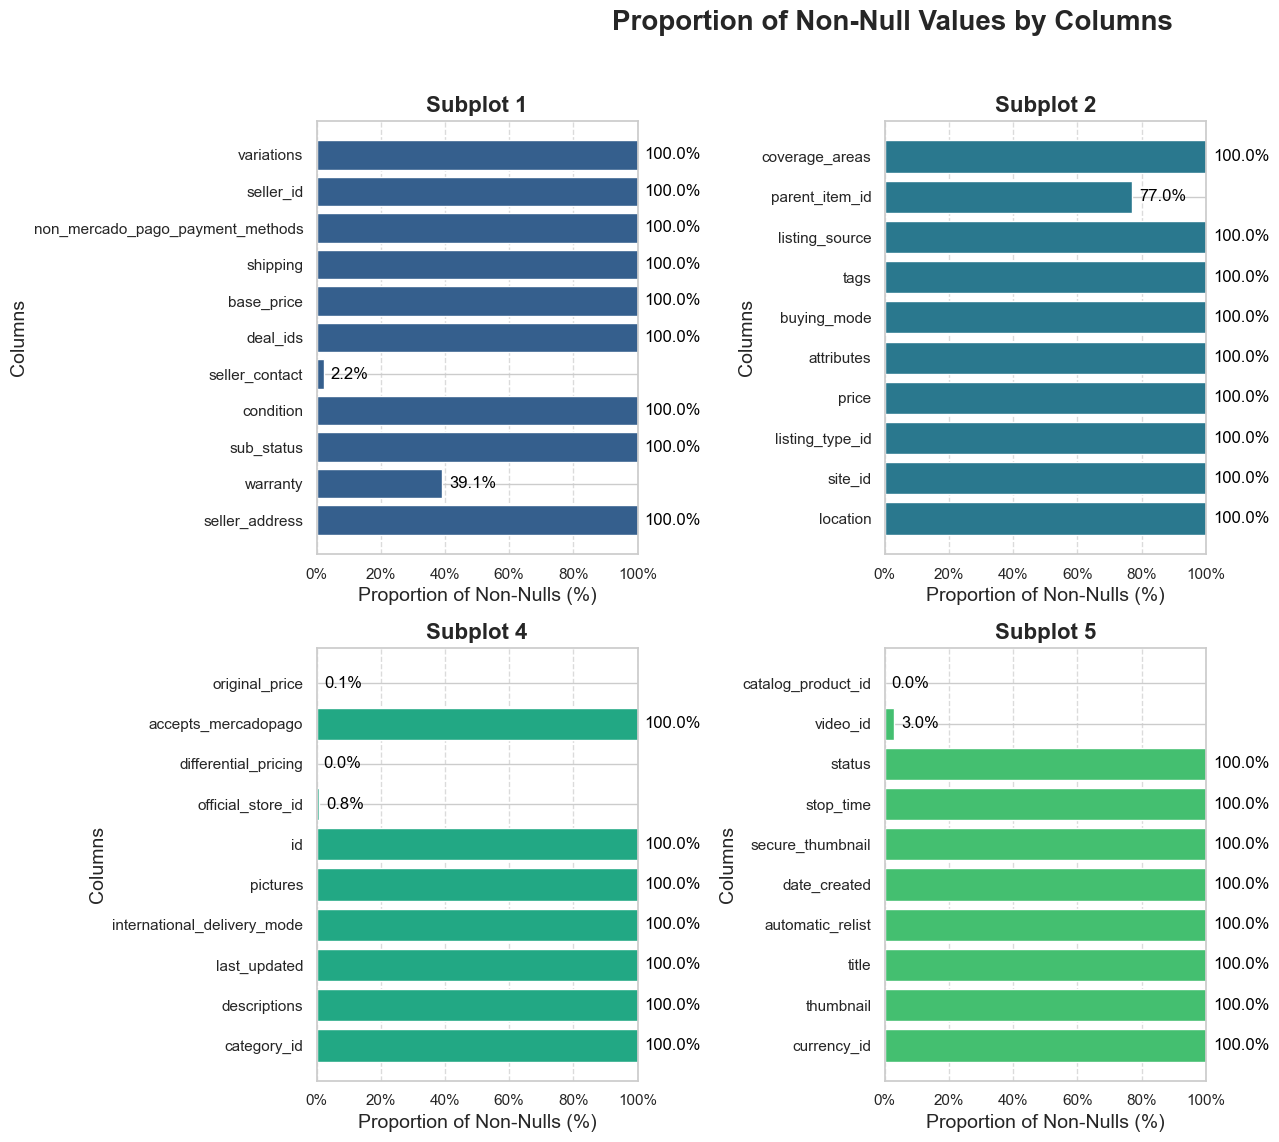

In [468]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  # Ensure mtick is imported
import numpy as np
import seaborn as sns

# Create subplots with a grid of 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Proportion of Non-Null Values by Columns', fontsize=20, fontweight='bold', y=0.95)

sns.set(style="whitegrid")

# Define a color palette using matplotlib's viridis colormap
colors = plt.cm.viridis(np.linspace(0.3, 0.7, 5))

# Plot each dictionary in a subplot
for i, ax in enumerate(axs.flat[:5]):  # Use only 5 subplots since we have 5 dictionaries
    if pltlist[i]:  # Only plot if the dictionary is not empty
        columns = list(pltlist[i].keys())
        null_proportions = list(pltlist[i].values())
        non_null_proportions = [100 - n for n in null_proportions]  # Calculate non-null proportions

        # Create a horizontal bar chart
        bars = ax.barh(columns, non_null_proportions, color=colors[i])

        # Set titles and labels
        ax.set_title(f'Subplot {i+1}', fontsize=16, fontweight='bold')
        ax.set_xlabel('Proportion of Non-Nulls (%)', fontsize=14)
        ax.set_ylabel('Columns', fontsize=14)
        ax.set_xlim(0, 100)  # Set the x-axis limit from 0 to 100
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())

        # Add percentage labels to the bars
        for bar in bars:
            width = bar.get_width()
            ax.annotate(f'{width:.1f}%', 
                        xy=(width, bar.get_y() + bar.get_height() / 2),
                        xytext=(5, 0),  # Horizontal offset
                        textcoords="offset points",
                        ha='left', va='center', fontsize=12, color='black')

        # Add grid lines
        ax.grid(axis='x', linestyle='--', alpha=0.7)

    else:
        ax.set_visible(False)  # If the dictionary is empty, hide the subplot

# Hide the empty subplot (last one in the 2x3 grid)
axs.flat[5].set_visible(False)

# Improve spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Adjust to prevent overlapping with the main title

# Display the figure
plt.show()


## Show the proportion of non-nulls

In [469]:
df.describe() #show the distribution of the numeric data

,base_price,seller_id,price,official_store_id,differential_pricing,original_price,catalog_product_id,subtitle,initial_quantity,sold_quantity,available_quantity
count,1.000000e+05,1.000000e+05,1.000000e+05,818.000000,0.0,143.000000,1.100000e+01,0.0,100000.000000,100000.000000,100000.000000
mean,5.252423e+04,8.425269e+07,5.252433e+04,206.443765,NaN,1593.341958,3.727643e+06,NaN,35.093370,2.396990,34.842380
std,8.623127e+06,5.497257e+07,8.623127e+06,128.252953,NaN,2245.798072,1.884698e+06,NaN,421.076196,42.685077,420.808403
min,8.400000e-01,1.304000e+03,8.400000e-01,1.000000,NaN,120.000000,9.440400e+04,NaN,1.000000,0.000000,1.000000
25%,9.000000e+01,3.953591e+07,9.000000e+01,84.000000,NaN,449.000000,3.050702e+06,NaN,1.000000,0.000000,1.000000
50%,2.500000e+02,7.631063e+07,2.500000e+02,216.000000,NaN,858.000000,5.093232e+06,NaN,1.000000,0.000000,1.000000
75%,8.000000e+02,1.325659e+08,8.000000e+02,312.750000,NaN,1500.000000,5.103216e+06,NaN,2.000000,0.000000,2.000000
max,2.222222e+09,1.946906e+08,2.222222e+09,446.000000,NaN,13999.000000,5.434513e+06,NaN,9999.000000,8676.000000,9999.000000


In [470]:
df.keys() #show the columns names

Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity'],
      dtype='object')

In [471]:
for i in index_keys:
    print(i, index_keys[i])

0 seller_address
1 warranty
2 sub_status
3 condition
4 seller_contact
5 deal_ids
6 base_price
7 shipping
8 non_mercado_pago_payment_methods
9 seller_id
10 variations
11 location
12 site_id
13 listing_type_id
14 price
15 attributes
16 buying_mode
17 tags
18 listing_source
19 parent_item_id
20 coverage_areas
21 category_id
22 descriptions
23 last_updated
24 international_delivery_mode
25 pictures
26 id
27 official_store_id
28 differential_pricing
29 accepts_mercadopago
30 original_price
31 currency_id
32 thumbnail
33 title
34 automatic_relist
35 date_created
36 secure_thumbnail
37 stop_time
38 status
39 video_id
40 catalog_product_id
41 subtitle
42 initial_quantity
43 start_time
44 permalink
45 geolocation
46 sold_quantity
47 available_quantity


In [472]:
df["status"].unique()

array(['active', 'paused', 'closed', 'not_yet_active'], dtype=object)

C:\Users\joanm\AppData\Local\Temp\ipykernel_24628\964804307.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette=colors)


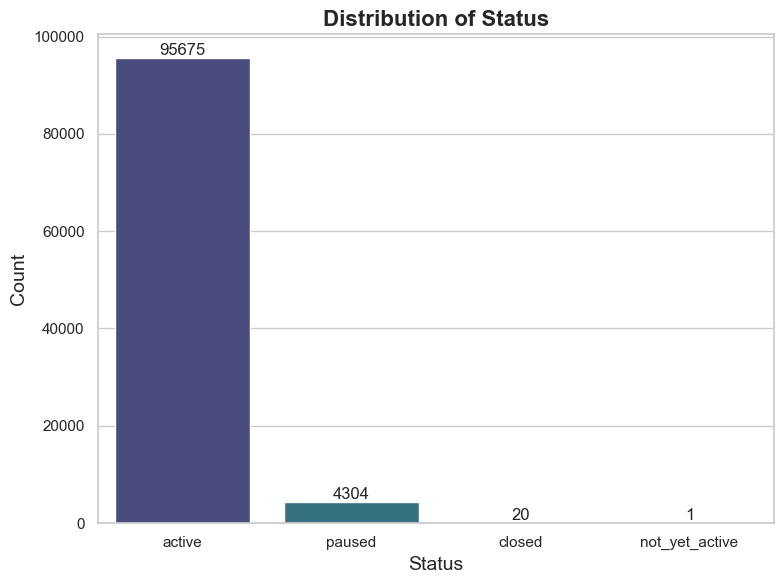

In [473]:
status_counts = df['status'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Set Seaborn style for better aesthetics

# Define a color palette
colors = sns.color_palette("viridis", len(status_counts))

# Plot the bar chart using Seaborn for enhanced visuals
sns.barplot(x=status_counts.index, y=status_counts.values, palette=colors)

# Set titles and labels
plt.title('Distribution of Status', fontsize=16, fontweight='bold')
plt.xlabel('Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count labels on top of each bar
for index, value in enumerate(status_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Show the distribution of the status column
- we observe that the status column dont have balance
- the data is skewness to the left

That is a json object into the table but the information it is not usable for the model because is a description and there aren't numeric values

Observe the information into the json in the first column


---

### We are looking for information of interest for the model

In [474]:
json_pattern = r"^\{.*\}$" #pattern to get if the object start with { an end with }
tst = re.match(json_pattern, "{hola}") #test if the pattern works
print(tst) #OK

<re.Match object; span=(0, 6), match='{hola}'>


In [475]:
string_objects = {}
for i in range(48):
    if re.match(json_pattern, str(df.iloc[0,i])): #search the pattern in the first row of any column
            string_objects[f"{dfkeys[i]}"] = i #save the columns wich match

In [476]:
string_objects # show the columns

{'seller_address': 0, 'shipping': 7, 'location': 11, 'geolocation': 45}

In [477]:
json_pattern2 = r".*\{.*\}*"
string_objects2 = {}
for i in range(48):
    if re.match(json_pattern2, str(df.iloc[0,i])):
        print(df.iloc[0,i])
        string_objects2[f"{dfkeys[i]}"] = i
#Enchance the search

{'comment': '', 'longitude': -58.3986709, 'id': 78162842, 'country': {'name': 'Argentina', 'id': 'AR'}, 'address_line': '', 'latitude': -34.6280698, 'search_location': {'neighborhood': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}, 'state': {'name': 'Capital Federal', 'id': 'TUxBUENBUGw3M2E1'}, 'city': {'name': 'Capital Federal', 'id': 'TUxBQ0NBUGZlZG1sYQ'}}, 'zip_code': '', 'city': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}}
{'local_pick_up': True, 'methods': [], 'tags': [], 'free_shipping': False, 'mode': 'not_specified', 'dimensions': None}
[{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Acordar con el comprador', 'id': 'MLAWC', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}]
{}
[{'id': 'MLA578052519-912855983'}]
[{'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/5386-MLA4352067878_052013-O.jpg', 'max_size': '1200x900', '

#### Get the columns with the json objects


In [478]:
print(string_objects2) #the list with all the json objects column

{'seller_address': 0, 'shipping': 7, 'non_mercado_pago_payment_methods': 8, 'location': 11, 'descriptions': 22, 'pictures': 25, 'geolocation': 45}


Looking for wich information these columns have

In [479]:
df["non_mercado_pago_payment_methods"]

0        [{'description': 'Transferencia bancaria', 'id...
1        [{'description': 'Transferencia bancaria', 'id...
2        [{'description': 'Transferencia bancaria', 'id...
3        [{'description': 'Transferencia bancaria', 'id...
4        [{'description': 'Transferencia bancaria', 'id...
                               ...                        
99995    [{'description': 'Transferencia bancaria', 'id...
99996    [{'description': 'Tarjeta de crédito', 'id': '...
99997                                                   []
99998    [{'description': 'Transferencia bancaria', 'id...
99999    [{'description': 'Transferencia bancaria', 'id...
Name: non_mercado_pago_payment_methods, Length: 100000, dtype: object

In [480]:
df.iloc[0,0]

{'comment': '',
 'longitude': -58.3986709,
 'id': 78162842,
 'country': {'name': 'Argentina', 'id': 'AR'},
 'address_line': '',
 'latitude': -34.6280698,
 'search_location': {'neighborhood': {'name': 'San Cristóbal',
   'id': 'TUxBQlNBTjkwNTZa'},
  'state': {'name': 'Capital Federal', 'id': 'TUxBUENBUGw3M2E1'},
  'city': {'name': 'Capital Federal', 'id': 'TUxBQ0NBUGZlZG1sYQ'}},
 'zip_code': '',
 'city': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'},
 'state': {'name': 'Capital Federal', 'id': 'AR-C'}}

here we can see just  4 posible interesting columns
- city
- country
- longitude
- latitude

In [481]:
df.iloc[0,7]

{'local_pick_up': True,
 'methods': [],
 'tags': [],
 'free_shipping': False,
 'mode': 'not_specified',
 'dimensions': None}

In [482]:
df.iloc[0,8]

[{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'},
 {'description': 'Acordar con el comprador', 'id': 'MLAWC', 'type': 'G'},
 {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}]

In [483]:
df.iloc[0,0]

{'comment': '',
 'longitude': -58.3986709,
 'id': 78162842,
 'country': {'name': 'Argentina', 'id': 'AR'},
 'address_line': '',
 'latitude': -34.6280698,
 'search_location': {'neighborhood': {'name': 'San Cristóbal',
   'id': 'TUxBQlNBTjkwNTZa'},
  'state': {'name': 'Capital Federal', 'id': 'TUxBUENBUGw3M2E1'},
  'city': {'name': 'Capital Federal', 'id': 'TUxBQ0NBUGZlZG1sYQ'}},
 'zip_code': '',
 'city': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'},
 'state': {'name': 'Capital Federal', 'id': 'AR-C'}}

In [484]:
df.iloc[0,22]

[{'id': 'MLA578052519-912855983'}]

In [485]:
df.iloc[0,25]

[{'size': '500x375',
  'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/5386-MLA4352067878_052013-O.jpg',
  'max_size': '1200x900',
  'url': 'http://mla-s1-p.mlstatic.com/5386-MLA4352067878_052013-O.jpg',
  'quality': '',
  'id': '5386-MLA4352067878_052013'},
 {'size': '500x375',
  'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/5361-MLA4352068035_052013-O.jpg',
  'max_size': '1200x900',
  'url': 'http://mla-s1-p.mlstatic.com/5361-MLA4352068035_052013-O.jpg',
  'quality': '',
  'id': '5361-MLA4352068035_052013'}]

In [486]:
df.iloc[0,11]

{}

In [487]:
df.iloc[0,45]

{'latitude': -34.6280698, 'longitude': -58.3986709}

    we saw that the information could be the same with the first column

In [488]:
def  compare_json_geo(row: pd.DataFrame) -> bool: #Function for get the columns wich have the same info
    json1 = row["seller_address"]
    json2 = row["geolocation"]
    return (
        json1["longitude"] == json2["longitude"]
    )and(
        json1["latitude"] == json2["latitude"]
    )

In [489]:
df["same_info_0_45"] = df.apply(compare_json_geo, axis=1) #create the column

In [490]:
df["same_info_0_45"].value_counts() #show the weird values

same_info_0_45
True     98249
False     1751
Name: count, dtype: int64

In [491]:
differents_locations = df[df["same_info_0_45"] == False][[index_keys["0"],index_keys["45"]]]#get the indexes

In [492]:
differents_locations.iloc[0,0]#compare the info

{'comment': '',
 'longitude': -58.3716129,
 'id': 154081243,
 'country': {'name': 'Argentina', 'id': 'AR'},
 'address_line': 'Defensa 850',
 'latitude': -34.6177886,
 'search_location': {'neighborhood': {'name': 'San Telmo',
   'id': 'TUxBQlNBTjgxMzNa'},
  'state': {'name': 'Capital Federal', 'id': 'TUxBUENBUGw3M2E1'},
  'city': {'name': 'Capital Federal', 'id': 'TUxBQ0NBUGZlZG1sYQ'}},
 'zip_code': '1065',
 'city': {'name': 'San Telmo', 'id': 'TUxBQlNBTjgxMzNa'},
 'state': {'name': 'Capital Federal', 'id': 'AR-C'}}

In [493]:
differents_locations.iloc[0,1]#possible nulls values errors

{'latitude': '', 'longitude': ''}

In [494]:
x = 0
listfalse = []
listtrue = []
for i in list(differents_locations.index):
    if (differents_locations.loc[i]["seller_address"]["longitude"] == "" or 
        differents_locations.loc[i]["geolocation"]["longitude"] == "") or (
        differents_locations.loc[i]["seller_address"]["latitude"] == "" or 
        differents_locations.loc[i]["geolocation"]["latitude"] == ""):
            listfalse.append(i)
            x+=1
            continue
    listtrue.append(i)
print(x)

1491


    Search for the columns without nulls errors

In [495]:
print(listfalse)

[59, 261, 294, 326, 484, 508, 596, 750, 1095, 1214, 1273, 1280, 1388, 1623, 1653, 1750, 1991, 2058, 2071, 2276, 2482, 2580, 2722, 2733, 2763, 2855, 2884, 2903, 2952, 3134, 3184, 3254, 3297, 3366, 3380, 3614, 3664, 3763, 3988, 4073, 4125, 4198, 4914, 4935, 5000, 5064, 5119, 5148, 5327, 5649, 5682, 5745, 5767, 5775, 5927, 5955, 6131, 6159, 6243, 6252, 6359, 6380, 6592, 6602, 6761, 6818, 6851, 6993, 7010, 7088, 7101, 7139, 7332, 7393, 7456, 7504, 7556, 7630, 7633, 7673, 7715, 7811, 8003, 8019, 8200, 8270, 8364, 8441, 8680, 8693, 8733, 8745, 8845, 8955, 9199, 9298, 9321, 9423, 9456, 9709, 9715, 9736, 9756, 9794, 9890, 9920, 10100, 10167, 10178, 10218, 10231, 10247, 10258, 10341, 10380, 10508, 10539, 10553, 10643, 10676, 10684, 10760, 10773, 10806, 10833, 10838, 10843, 10895, 11013, 11035, 11070, 11164, 11227, 11311, 11468, 11540, 11588, 11770, 11778, 11808, 11834, 11896, 11924, 11974, 12134, 12147, 12188, 12221, 12288, 12328, 12407, 12430, 12444, 12475, 12508, 12532, 12612, 12726, 12754, 1

    Show the columns with nulls errors

In [496]:
print(listtrue.__len__())

260


In [497]:
print(listtrue)

[1250, 1384, 1590, 1657, 2107, 3319, 3369, 3519, 3604, 3917, 4222, 5423, 5445, 6768, 6923, 7199, 8067, 9185, 9426, 9498, 9534, 10924, 11324, 12514, 13147, 13150, 13210, 13280, 14051, 14611, 15203, 15301, 15409, 16387, 16436, 16478, 16952, 17027, 17203, 18396, 19149, 19192, 19220, 19421, 19477, 19499, 19735, 20062, 20571, 21044, 21350, 21513, 21680, 22247, 23328, 24100, 24505, 24952, 25158, 25604, 25763, 25830, 26374, 26573, 26770, 27234, 27612, 27614, 27736, 27986, 28097, 28474, 28869, 28916, 29071, 29360, 30669, 31004, 32577, 32631, 33371, 33668, 34163, 34311, 34437, 34518, 34819, 35015, 35560, 35606, 35878, 35916, 36127, 36255, 36349, 36548, 36977, 37121, 37221, 37826, 38541, 38798, 39431, 39496, 39620, 39810, 40281, 40336, 42225, 42443, 42461, 42509, 42998, 43116, 44440, 44886, 45769, 46256, 46411, 46478, 46949, 47271, 47289, 47786, 48147, 48163, 48271, 48346, 48456, 48517, 49018, 50230, 50491, 50506, 51580, 51925, 52416, 52440, 53147, 54434, 54714, 54972, 55215, 55578, 55709, 56176

    show the columns with problems

In [498]:
differents_locations.loc[1250]["seller_address"]

{'comment': '',
 'longitude': -58.6167212,
 'id': 73143250,
 'country': {'name': 'Argentina', 'id': 'AR'},
 'address_line': 'san martin SN',
 'latitude': -34.6558611,
 'search_location': {'neighborhood': {'name': '', 'id': ''},
  'state': {'name': 'Bs.As. G.B.A. Oeste', 'id': 'TUxBUEdSQWVmNTVm'},
  'city': {'name': 'Morón', 'id': 'TUxBQ01PUmI1NTBj'}},
 'zip_code': '1708',
 'city': {'name': 'Morón', 'id': 'TUxBQ01PUmI1NTBj'},
 'state': {'name': 'Buenos Aires', 'id': 'AR-B'}}

In [499]:
differents_locations.loc[1250]["geolocation"]

{'latitude': -34.6477684, 'longitude': -58.6138669}

#### compare information and we infer :
-   the values are incorrect due to the small number of records to which this happens

In [500]:
df[["price", "base_price"]]

,price,base_price
0,80.0,80.0
1,2650.0,2650.0
2,60.0,60.0
3,580.0,580.0
4,30.0,30.0
...,...,...
99995,30.0,30.0
99996,239.0,239.0
99997,600.0,600.0
99998,50.0,50.0


#### lok for differences in these columns
- it seems that the values are equals

                      base_price  seller_id     price  official_store_id  \
base_price              1.000000   0.000526  1.000000           0.062421   
seller_id               0.000526   1.000000  0.000526           0.237865   
price                   1.000000   0.000526  1.000000           0.062421   
official_store_id       0.062421   0.237865  0.062421           1.000000   
differential_pricing         NaN        NaN       NaN                NaN   
original_price          0.994437  -0.140377  0.994437           0.208642   
catalog_product_id     -0.543475  -0.332736 -0.543475                NaN   
subtitle                     NaN        NaN       NaN                NaN   
initial_quantity       -0.000362   0.020062 -0.000362           0.016202   
sold_quantity          -0.000337  -0.005827 -0.000337           0.001006   
available_quantity     -0.000359   0.020055 -0.000359           0.016116   

                      differential_pricing  original_price  \
base_price               

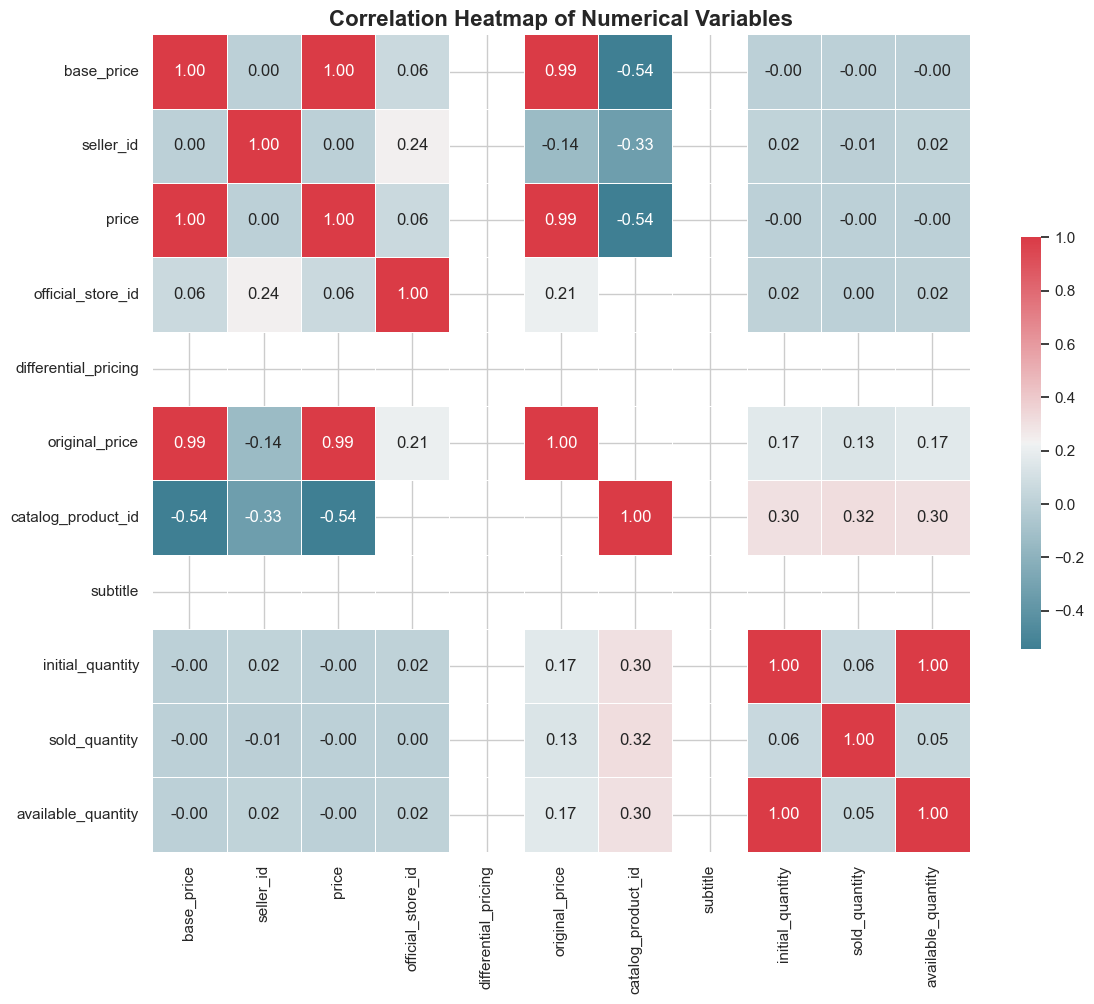

In [501]:
# Select only numeric columns
df_num = df.select_dtypes(include=['number'])


# Calculate the correlation matrix
correlation_matrix = df_num.corr()

print(correlation_matrix)


# Configure the figure size
plt.figure(figsize=(12, 10))


cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate the heatmap
sns.heatmap(
    correlation_matrix, 
    cmap=cmap, 
    annot=True, 
    fmt=".2f",
    linewidths=.5, 
    cbar_kws={"shrink": .5}, 
    square=True
)

plt.title('Correlation Heatmap of Numerical Variables', fontsize=16, fontweight='bold')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

### HEAT MAP
- We observe that subtitle and differenteial_pricing are mostly null
- the attributes price and original_price are highly correlated (for that we only use one of these columns) - price
- the available_quantity and initial_quantity are highly correlated (for that we only use one of these columns) - available_quantity
- base_price original_price () - original_price


####   (PCA) looks like a good option
    problems : 
- the rest of the attributes are ids that really dont have weight in the model rather it skews it 
- which probably would leave us with only one variable

In [502]:
def get_price_duplicates(row):
    return row["price"] == row["base_price"]

In [503]:
price_dup = pd.DataFrame()
price_dup['is_price_duplicate'] = df.apply(get_price_duplicates, axis=1)


In [504]:
price_dup.value_counts()

is_price_duplicate
True                  99971
False                    29
Name: count, dtype: int64

In [505]:
price_dup[price_dup["is_price_duplicate"] == False].head(5)

,is_price_duplicate
1822,False
2498,False
2654,False
7949,False
15082,False


In [506]:
df[["price", "base_price"]].loc[15082]

price         8.5
base_price    1.0
Name: 15082, dtype: float64

We observe that are just 29 registers with differents values probably errors this columns are the same

---

In [507]:
def json_get_country(row):
    country = row["seller_address"]["country"]["name"]
    if country != None and country != "":
        return country
    return None


In [508]:
def json_get_city(row):
    try:
        city = row["seller_address"]["city"]["name"]
        if city != None and city != "":
            return city
        return None
    except Exception as e:
        print("city dont exist")
        return None

In [509]:
df["country"] = df.apply(json_get_country, axis=1)



In [510]:
df["country"].value_counts()

country
Argentina    99997
Name: count, dtype: int64

### All the entries are in ARGENTINA
    we desided to rm the column
    

In [511]:
df.drop(columns="country", inplace=True)
print("Ok")

Ok


---

In [512]:
df["condition"].isna().value_counts()

condition
False    100000
Name: count, dtype: int64

In [513]:
df["price"].isna().value_counts()

price
False    100000
Name: count, dtype: int64

In [514]:
df["city"] = df.apply(json_get_city, axis=1)

In [515]:
df["city"].unique().__len__()

3656

#### we observe that we have 3600 cities

---

### PCA

In [516]:
# Eliminar todas las columnas de tipo datetime
df_num.dropna(inplace=True, axis=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)
pca = PCA(n_components=len(df_num.columns))  # Número de componentes igual al número de variables
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)



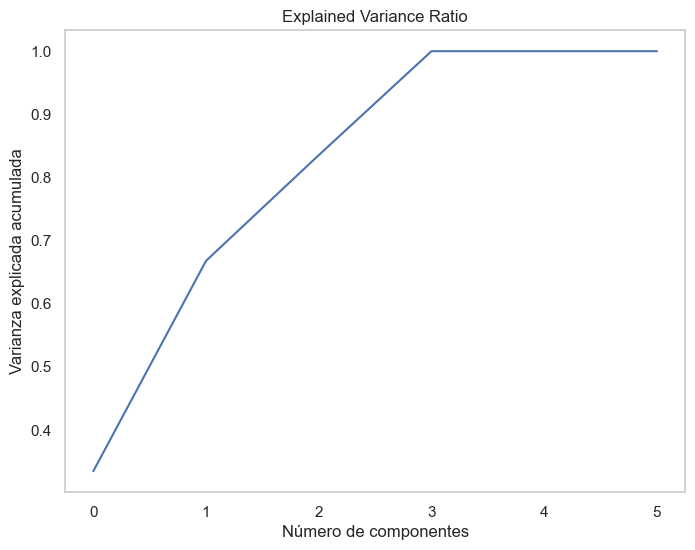

In [517]:

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Explained Variance Ratio')
plt.grid()
plt.show()

In [518]:
# Ver la proporción de varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_
print(varianza_explicada)


[3.34452044e-01 3.33320067e-01 1.67507153e-01 1.64714555e-01
 6.18061938e-06 5.05341557e-13]


In [519]:
# Calcular la varianza explicada acumulada
varianza_acumulada = np.cumsum(varianza_explicada)
print(varianza_acumulada)


[0.33445204 0.66777211 0.83527926 0.99999382 1.         1.        ]


In [520]:
pca_3 = PCA(n_components=3)
df_pca_3 = pca_3.fit_transform(df_scaled)

# Convertir a DataFrame
df_pca_components_3 = pd.DataFrame(df_pca_3, columns=[f'Componente_{i+1}' for i in range(3)])

# Ver los primeros datos con las 3 componentes principales
df_pca_components_3.head()

,Componente_1,Componente_2,Componente_3
0,-0.121026,-0.022004,-0.106167
1,-0.137450,-0.023839,-0.589017
2,-0.091902,-0.017999,0.752476
3,-0.087118,-0.017255,0.893800
4,-0.110099,-0.020509,0.215960


In [521]:
df_pca_components_3.shape

(100000, 3)

In [522]:
df = pd.concat([df, df_pca_components_3], axis=1)
print("OK")

OK


In [523]:
df.keys()

Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity',
       'same_info_0_45', 'city', 'Componente_1', 'Componente_2',
       'Componente_3'],
      dtype='object')

### We see that we can explaint the 100% of the variabilitie with 3 of 11 numerical components

In [524]:
# Imprimir los componentes principales
print(pca.components_)


[[-7.69177181e-02  2.73992150e-02 -7.69177187e-02  7.00700501e-01
   7.58028836e-02  7.00492215e-01]
 [ 7.02910577e-01  3.77040379e-03  7.02910577e-01  7.66821013e-02
   7.86748393e-03  7.66627861e-02]
 [-6.15605469e-04  8.07801252e-01 -6.15600839e-04  1.43911590e-02
  -5.89015345e-01  1.76123978e-02]
 [-7.72536488e-05  5.88805743e-01 -7.72509010e-05 -5.28030077e-02
   8.04510848e-01 -5.72880706e-02]
 [ 6.01780973e-07 -3.14592924e-05  5.40187906e-07  7.07208173e-01
  -3.90437752e-03 -7.06994593e-01]
 [-7.07106781e-01 -3.77789622e-09  7.07106781e-01  3.11583942e-08
   2.27583716e-10 -3.04361223e-08]]


---

###    Function to create the dummies


In [525]:
"""
city_list = df["city"].to_list()
def create_city_dumies(row, city):
    if row["city"] == city:
        return 1
    return 0
"""

'\ncity_list = df["city"].to_list()\ndef create_city_dumies(row, city):\n    if row["city"] == city:\n        return 1\n    return 0\n'

In [526]:
"""
df_test = df.copy()
#Create a copy of the test
dummies_df = pd.DataFrame()
for i in city_list:
    dummies_df[f"{i}"] = df_test.apply(create_city_dumies, axis=1, args=(i,))
df = pd.concat([df_test, dummies_df], axis=1)
"""

'\ndf_test = df.copy()\n#Create a copy of the test\ndummies_df = pd.DataFrame()\nfor i in city_list:\n    dummies_df[f"{i}"] = df_test.apply(create_city_dumies, axis=1, args=(i,))\ndf = pd.concat([df_test, dummies_df], axis=1)\n'

### Not Run for compute complexity
- +3600 concat columns


---

#### Pd Vectorial Function for that

#### Create the dummies

In [527]:
dummies_df = pd.get_dummies(df['city'], prefix='city', drop_first=False, dtype=int)
dummies_df = pd.concat([df, dummies_df], axis=1)

In [528]:
threshold = 10
city_counts = df['city'].value_counts()
cities_to_keep = city_counts[city_counts >= threshold].index
dummies_df['city_reduced'] = df['city'].apply(lambda x: x if x in cities_to_keep else 'Otros')

dummies_df.drop(['city', 'city_reduced'], axis=1, inplace=True)


In [529]:
accepts_mercado_pago_dummies = pd.get_dummies(dummies_df["accepts_mercadopago"], prefix="accepts_mercadopago", drop_first=False, dtype=int)
dummies_df = pd.concat([dummies_df, accepts_mercado_pago_dummies], axis=1)
dummies_df.drop(columns="accepts_mercadopago", inplace=True)
print("Ok")

Ok


In [530]:
df["buying_mode"].unique()

array(['buy_it_now', 'classified', 'auction'], dtype=object)

In [531]:
buying_mode_dumm = pd.get_dummies(dummies_df["buying_mode"], prefix="buying_mode", drop_first=False, dtype=int)
dummies_df = pd.concat([dummies_df, buying_mode_dumm], axis=1)
dummies_df.drop(columns="buying_mode", inplace=True)
print("ok")

ok


In [532]:
df["automatic_relist"].unique()

array([False,  True])

In [533]:
automatic_dumm = pd.get_dummies(dummies_df["automatic_relist"], prefix="automatic_relist", drop_first=False, dtype=int)
dummies_df = pd.concat([dummies_df, automatic_dumm], axis=1)
dummies_df.drop(columns="automatic_relist", inplace=True)
print("ok")

ok


In [534]:
df["status"].unique()

array(['active', 'paused', 'closed', 'not_yet_active'], dtype=object)

In [535]:
status_dumm = pd.get_dummies(dummies_df["status"], prefix="status", drop_first=False, dtype=int)
dummies_df = pd.concat([dummies_df, status_dumm], axis=1)
dummies_df.drop(columns="status", inplace=True)
print("ok")

ok


In [536]:
df.keys()

Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity',
       'same_info_0_45', 'city', 'Componente_1', 'Componente_2',
       'Componente_3'],
      dtype='object')

In [543]:
df_dummies_train = dummies_df.drop(columns=['seller_contact', 'deal_ids', 'geolocation', 'permalink',
                                            'seller_address', 'international_delivery_mode',
                                            'title', 'warranty', 'sub_status', 'seller_contact', 
                                            'deal_ids', 'base_price', 'shipping', 'non_mercado_pago_payment_methods',
                                            'seller_id', 'variations', 'location', 'site_id',
                                            'listing_type_id', 'attributes', 'tags', 'listing_source',
                                            'parent_item_id', 'coverage_areas', 'category_id', 'descriptions', 'last_updated',
                                            'pictures', 'id', 'official_store_id','currency_id', 'thumbnail', 'title',
                                            'secure_thumbnail', 'stop_time', 'video_id', 'catalog_product_id', 'subtitle',
                                            'start_time', 'permalink', 'geolocation', 'same_info_0_45',
                                            'differential_pricing', 'original_price', 'date_created',
                                            'Componente_1', 'Componente_2', 'Componente_3'
                                            ])

In [544]:
df_dummies_train_PCA = dummies_df.drop(columns=['seller_contact', 'deal_ids', 'geolocation', 'permalink',
                                            'seller_address', 'international_delivery_mode',
                                            'title', 'warranty', 'sub_status', 'seller_contact', 
                                            'deal_ids', 'base_price', 'shipping', 'non_mercado_pago_payment_methods',
                                            'seller_id', 'variations', 'location', 'site_id',
                                            'listing_type_id', 'attributes', 'tags', 'listing_source',
                                            'parent_item_id', 'coverage_areas', 'category_id', 'descriptions', 'last_updated',
                                            'pictures', 'id', 'official_store_id','currency_id', 'thumbnail', 'title',
                                            'secure_thumbnail', 'stop_time', 'video_id', 'catalog_product_id', 'subtitle',
                                            'start_time', 'permalink', 'geolocation', 'same_info_0_45',
                                            'differential_pricing', 'original_price', 'date_created',
                                            'price', 'initial_quantity', 'sold_quantity',
                                            'available_quantity'
                                            ])

In [539]:
df_dummies_train.shape

(100000, 3670)

In [540]:
df_dummies_train.keys()

Index(['condition', 'Componente_1', 'Componente_2', 'Componente_3',
       'city_(9103) Rawson', 'city_(Buenos Aires) - La Matanza',
       'city_(Virreyes)', 'city_(congreso)', 'city_(v.crespo)',
       'city_(zona Congreso)',
       ...
       'accepts_mercadopago_True', 'buying_mode_auction',
       'buying_mode_buy_it_now', 'buying_mode_classified',
       'automatic_relist_False', 'automatic_relist_True', 'status_active',
       'status_closed', 'status_not_yet_active', 'status_paused'],
      dtype='object', length=3670)

In [565]:
columns_to_drop = [col for col in df_dummies_train.columns if col.startswith('city')]
df_short_train = df_dummies_train.drop(columns=columns_to_drop)
df_short_train_PCA = df_dummies_train_PCA.drop(columns=columns_to_drop)
# Eliminar columnas que comienzan con 'city
print(f"Número de columnas después de eliminar las columnas que comienzan con 'city': {df_short_train.shape[1]}")
print(f"Número de columnas después de eliminar las columnas que comienzan con 'city': {df_short_train_PCA.shape[1]}")

Número de columnas después de eliminar las columnas que comienzan con 'city': 16
Número de columnas después de eliminar las columnas que comienzan con 'city': 15


In [546]:
df_short_train.keys()

Index(['condition', 'price', 'initial_quantity', 'sold_quantity',
       'available_quantity', 'accepts_mercadopago_False',
       'accepts_mercadopago_True', 'buying_mode_auction',
       'buying_mode_buy_it_now', 'buying_mode_classified',
       'automatic_relist_False', 'automatic_relist_True', 'status_active',
       'status_closed', 'status_not_yet_active', 'status_paused'],
      dtype='object')

In [547]:
df_dummies_train_PCA.keys()

Index(['condition', 'Componente_1', 'Componente_2', 'Componente_3',
       'city_(9103) Rawson', 'city_(Buenos Aires) - La Matanza',
       'city_(Virreyes)', 'city_(congreso)', 'city_(v.crespo)',
       'city_(zona Congreso)',
       ...
       'accepts_mercadopago_True', 'buying_mode_auction',
       'buying_mode_buy_it_now', 'buying_mode_classified',
       'automatic_relist_False', 'automatic_relist_True', 'status_active',
       'status_closed', 'status_not_yet_active', 'status_paused'],
      dtype='object', length=3670)

---

### MODELS

In [241]:
df["condition"].unique()

array(['new', 'used'], dtype=object)

#### Verify the column with the variable to predict

---

In [242]:
"""import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Supongamos que ya tienes cargado tu DataFrame df_dummies_train

# Aseguramos que 'condition' sea binaria (0 o 1)
df_dummies_train['condition'] = df_dummies_train['condition'].map({'new': 1, 'used': 0})

# Verificar si hay valores NaN después del mapeo
print("Valores únicos en 'condition' después del mapeo:", df_dummies_train['condition'].unique())
print("Número de NaNs en 'condition':", df_dummies_train['condition'].isnull().sum())

# Si hay NaNs en 'condition', eliminamos esas filas
if df_dummies_train['condition'].isnull().any():
    df_dummies_train = df_dummies_train.dropna(subset=['condition'])

# Separar la variable objetivo y las variables predictoras
y = df_dummies_train['condition']
X = df_dummies_train.drop('condition', axis=1)

# Paso 1: Verificar valores faltantes o infinitos
# Verificar valores NaN
nan_in_X = X.isnull().any().any()
nan_in_y = y.isnull().any()

# Verificar valores infinitos
inf_in_X = np.isinf(X).any().any()
inf_in_y = np.isinf(y).any()

print(f"NaN en X: {nan_in_X}, NaN en y: {nan_in_y}")
print(f"Infinito en X: {inf_in_X}, Infinito en y: {inf_in_y}")

# Reemplazar infinitos por NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Contar cuántos valores faltantes hay
total_nans = X.isnull().sum().sum()
print("Número total de valores NaN en X:", total_nans)

# Si hay valores faltantes, imputarlos
if total_nans > 0:
    print("Imputando valores faltantes en X...")
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X = pd.DataFrame(X_imputed, columns=X.columns)
else:
    print("No hay valores faltantes en X.")

# Asegurarse de que aún tenemos muestras después de la imputación
print(f"Número de filas en X después de la imputación: {X.shape[0]}")

# Paso 2: Eliminar columnas constantes o de varianza cero
print("Aplicando VarianceThreshold...")
if X.shape[0] == 0:
    print("Error: No hay muestras en X después de la limpieza. Revisa tus datos.")
else:
    selector = VarianceThreshold(threshold=0)
    selector.fit(X)
    X = X[X.columns[selector.get_support(indices=True)]]

    print(f"Número de columnas después de eliminar las constantes: {X.shape[1]}")

    # Paso 3: Reducir dimensionalidad
    # Calcular matriz de correlación
    corr_matrix = X.corr().abs()

    # Seleccionar el triángulo superior
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Encontrar índices de columnas con correlación mayor que un umbral (por ejemplo, 0.95)
    threshold_corr = 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > threshold_corr)]

    # Eliminar columnas altamente correlacionadas
    X = X.drop(columns=to_drop)

    print(f"Número de columnas después de eliminar las altamente correlacionadas: {X.shape[1]}")

    # Paso 4: Escalar las variables
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Paso 5: Ajustar el modelo GLM con familia binomial
    # Agregar una constante
    X_scaled_const = sm.add_constant(X_scaled)

    # Ajustar el modelo
    model = sm.GLM(y, X_scaled_const, family=sm.families.Binomial())

    try:
        result = model.fit()
        # Imprimir el resumen del modelo
        print(result.summary())
    except Exception as e:
        print("Error al ajustar el modelo:")
        print(e)
        print("Intentando con un método de optimización alternativo...")
        try:
            result = model.fit(method='bfgs')
            print(result.summary())
        except Exception as e2:
            print("Error al ajustar el modelo con método alternativo:")
            print(e2)
            print("Considera reducir aún más la dimensionalidad o revisar tus datos.")

    # Paso 6: Verificar la singularidad de la matriz de diseño
    rank = np.linalg.matrix_rank(X_scaled_const)
    print(f"Rango de X_scaled_const: {rank}, Número de columnas en X_scaled_const: {X_scaled_const.shape[1]}")

    if rank < X_scaled_const.shape[1]:
        print("La matriz de diseño es singular. Puedes considerar eliminar variables redundantes o usar PCA.")

# Asegúrate de que y no tenga valores faltantes
if y.isnull().any():
    print("Eliminando filas donde y es NaN...")
    df_dummies_train = df_dummies_train[~df_dummies_train['condition'].isnull()]
    y = df_dummies_train['condition']
    X = df_dummies_train.drop('condition', axis=1)

"""

'import pandas as pd\nimport numpy as np\nimport statsmodels.api as sm\nfrom sklearn.feature_selection import VarianceThreshold\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.impute import SimpleImputer\n\n# Supongamos que ya tienes cargado tu DataFrame df_dummies_train\n\n# Aseguramos que \'condition\' sea binaria (0 o 1)\ndf_dummies_train[\'condition\'] = df_dummies_train[\'condition\'].map({\'new\': 1, \'used\': 0})\n\n# Verificar si hay valores NaN después del mapeo\nprint("Valores únicos en \'condition\' después del mapeo:", df_dummies_train[\'condition\'].unique())\nprint("Número de NaNs en \'condition\':", df_dummies_train[\'condition\'].isnull().sum())\n\n# Si hay NaNs en \'condition\', eliminamos esas filas\nif df_dummies_train[\'condition\'].isnull().any():\n    df_dummies_train = df_dummies_train.dropna(subset=[\'condition\'])\n\n# Separar la variable objetivo y las variables predictoras\ny = df_dummies_train[\'condition\']\nX = df_dummies_train.drop(\'condi

In [ ]:
ax, fig  = plt.subplot(2,3)


## No run that for compute capacity 😓

---

In [550]:
from sklearn.metrics import roc_curve, auc

In [557]:
def plot_metrics(y_test, y_pred, y_prob, model_name):
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(14, 6))
    
    # Subplot 1: ROC Curve
    plt.subplot(1, 3, 1)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    
    # Subplot 2: Confusion Matrix
    plt.subplot(1, 3, 2)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Subplot 3: Bar plot for metrics
    plt.subplot(1, 3, 3)
    metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'AUC-ROC': auc_roc}
    metric_names = list(metrics.keys())
    metric_values = list(metrics.values())
    sns.barplot(x=metric_values, y=metric_names)
    plt.title(f'Metrics ({model_name})')
    plt.xlim([0, 1])
    
    plt.tight_layout()
    plt.show()


---

## 1st MODEL

Metrics for Logistic Regression:
Accuracy: 0.707
Precision: 0.8877534727766246
Recall: 0.5188019035177754
F1 Score: 0.6548881036513545
AUC-ROC: 0.7422210065503647
Confusion Matrix:
 [[8580  703]
 [5157 5560]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.92      0.75      9283
           1       0.89      0.52      0.65     10717

    accuracy                           0.71     20000
   macro avg       0.76      0.72      0.70     20000
weighted avg       0.77      0.71      0.70     20000

--------------------------------------------------
Metrics for Random Forest:
Accuracy: 0.79675
Precision: 0.8759891476373503
Recall: 0.7230568256041803
F1 Score: 0.7922097837754946
AUC-ROC: 0.8649976829382404
Confusion Matrix:
 [[8186 1097]
 [2968 7749]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80      9283
           1       0.88      0.72      0.79     107

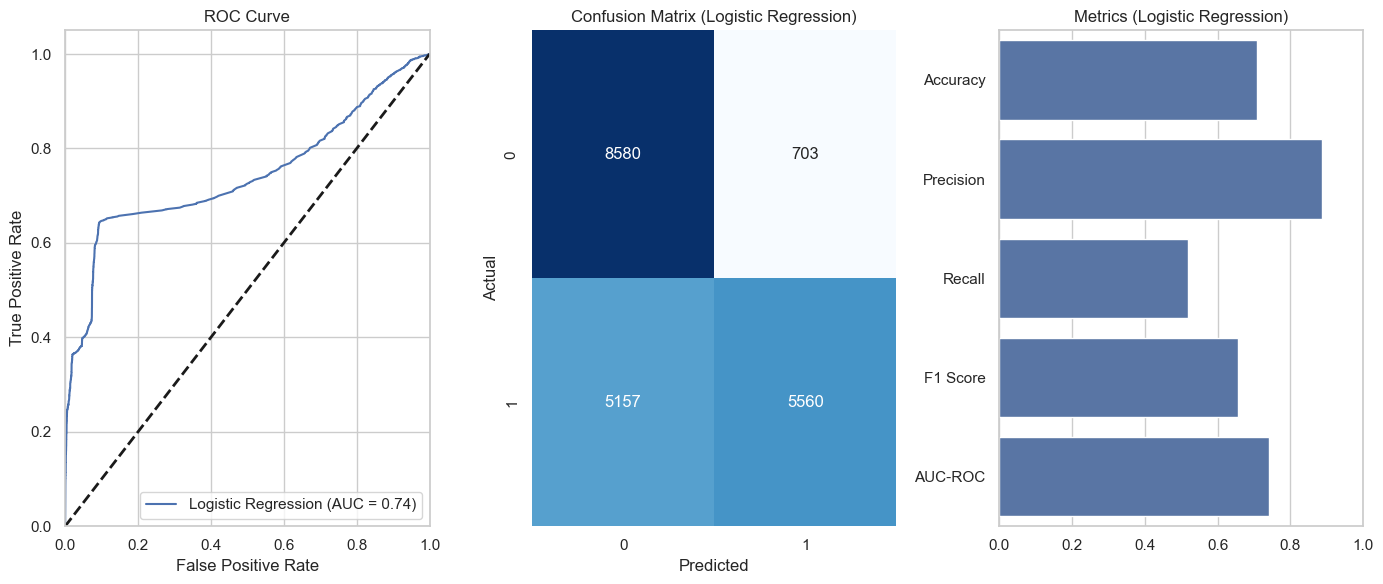

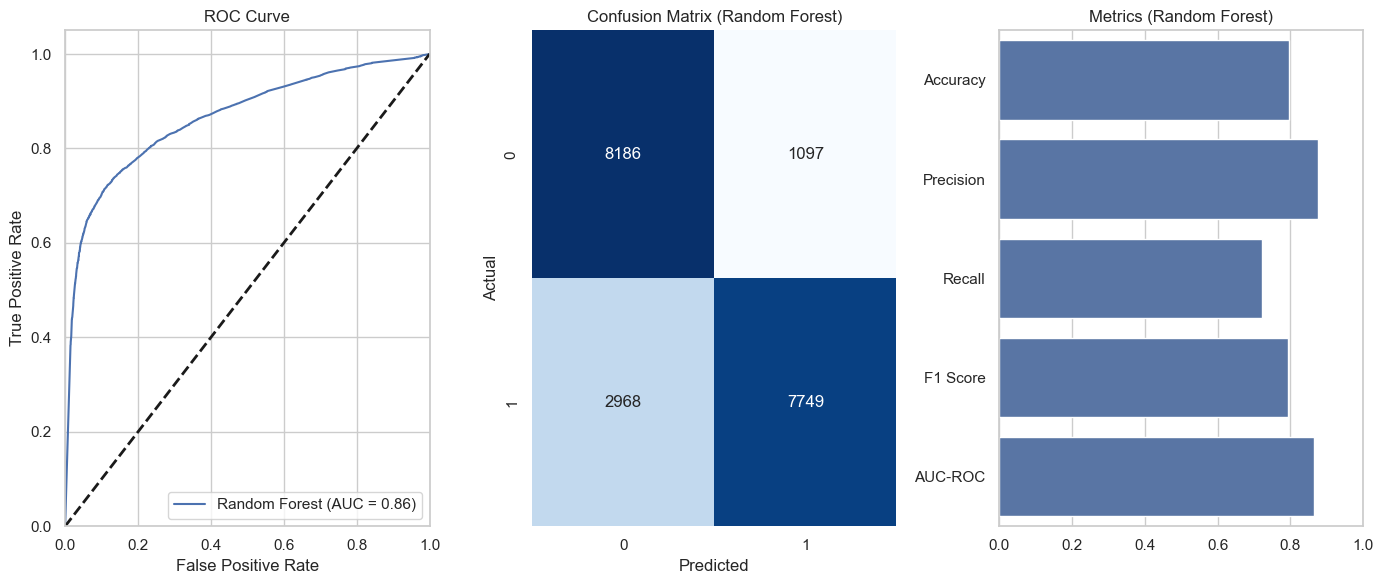

In [566]:
df_short_train['condition'] = df_short_train['condition'].map({'new': 1, 'used': 0})
X = df_short_train.drop('condition', axis=1)
y = df_short_train['condition']

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Step 5: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Step 6: Calculate the metrics
def print_metrics(y_test, y_pred, y_prob, model_name):
    print(f"Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

print_metrics(y_test, y_pred_logistic, y_prob_logistic, "Logistic Regression")
print_metrics(y_test, y_pred_rf, y_prob_rf, "Random Forest")

# Step 8: Save the models
joblib.dump(logistic_model, '../Models/logistic_model.pkl')
joblib.dump(rf_model, '../Models/rf_model.pkl')
# Graficar métricas para Logistic Regression
plot_metrics(y_test, y_pred_logistic, y_prob_logistic, "Logistic Regression")

# Graficar métricas para Random Forest
plot_metrics(y_test, y_pred_rf, y_prob_rf, "Random Forest")

# WITHOUT PCA

## First Train with rf and logistic regretion

metrics 
- 80% accurracy

Metrics for Logistic Regression:
Accuracy: 0.69485
Precision: 0.7555949479282074
Recall: 0.6363721190631707
F1 Score: 0.6908777794661399
AUC-ROC: 0.756143792059159
Confusion Matrix:
 [[7077 2206]
 [3897 6820]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.76      0.70      9283
           1       0.76      0.64      0.69     10717

    accuracy                           0.69     20000
   macro avg       0.70      0.70      0.69     20000
weighted avg       0.70      0.69      0.69     20000

--------------------------------------------------
Metrics for Random Forest:
Accuracy: 0.8201
Precision: 0.8362142249929159
Recall: 0.826070728748717
F1 Score: 0.8311115283514833
AUC-ROC: 0.906006137894239
Confusion Matrix:
 [[7549 1734]
 [1864 8853]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      9283
           1       0.84      0.83      0.83     10717

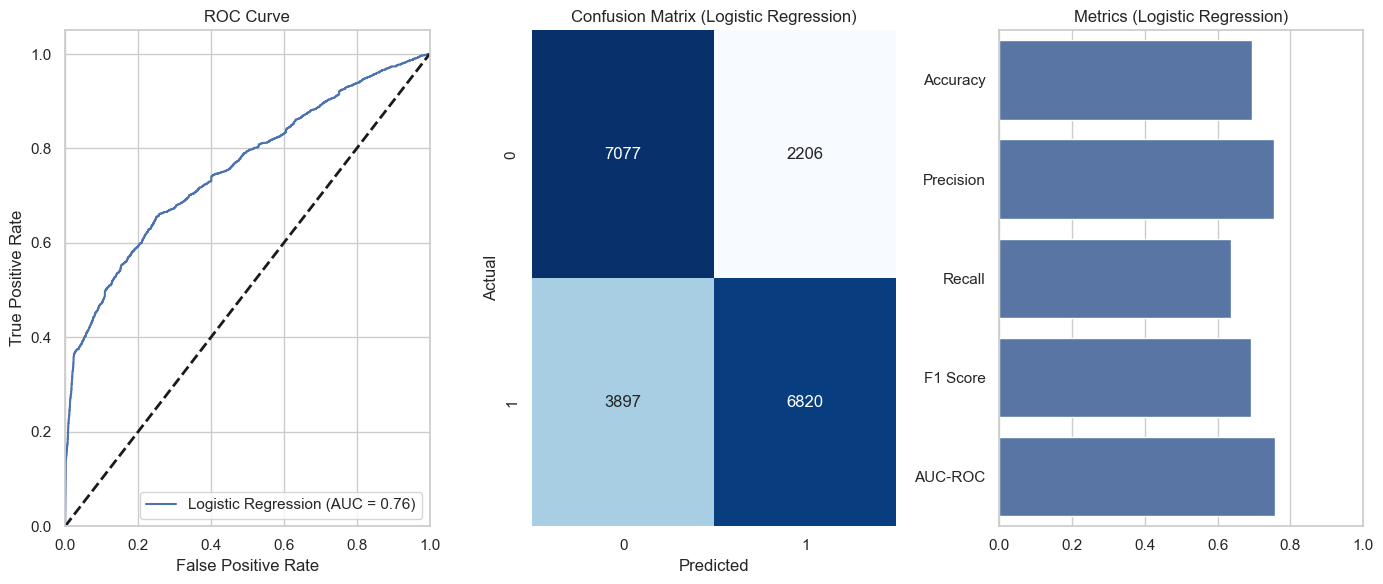

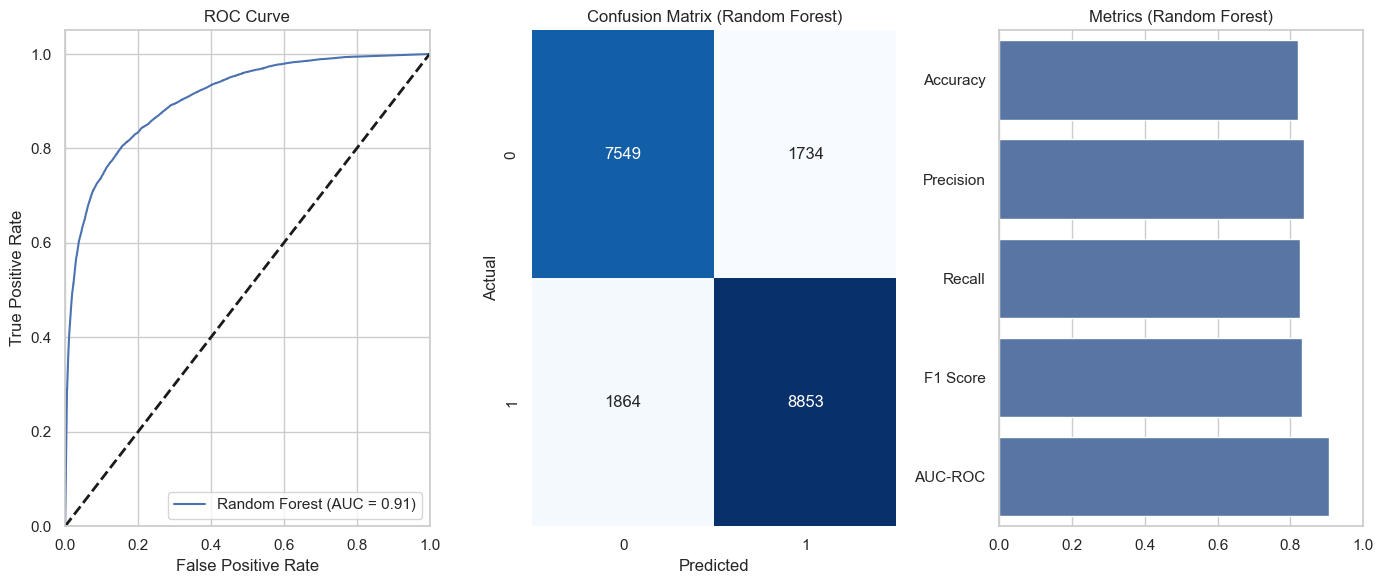

In [567]:
df_short_train_PCA['condition'] = df_short_train_PCA['condition'].map({'new': 1, 'used': 0})
X = df_short_train_PCA.drop('condition', axis=1)
y = df_short_train_PCA['condition']

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Step 5: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Step 6: Calculate the metrics
def print_metrics(y_test, y_pred, y_prob, model_name):
    print(f"Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

print_metrics(y_test, y_pred_logistic, y_prob_logistic, "Logistic Regression")
print_metrics(y_test, y_pred_rf, y_prob_rf, "Random Forest")

joblib.dump(logistic_model, '../Models/logistic_modelPCA.pkl')
joblib.dump(rf_model, '../Models/rf_modelPCA.pkl')

# Graficar métricas para Logistic Regression
plot_metrics(y_test, y_pred_logistic, y_prob_logistic, "Logistic Regression")

# Graficar métricas para Random Forest
plot_metrics(y_test, y_pred_rf, y_prob_rf, "Random Forest")

# PCA

---

---

## 2nd MODEL

Metrics for Optimized Random Forest with SMOTE:
Accuracy: 0.82175
Precision: 0.8466459868165955
Recall: 0.8149668750583186
F1 Score: 0.8305044453953312
AUC-ROC: 0.9084603999856824
Confusion Matrix:
 [[7701 1582]
 [1983 8734]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      9283
           1       0.85      0.81      0.83     10717

    accuracy                           0.82     20000
   macro avg       0.82      0.82      0.82     20000
weighted avg       0.82      0.82      0.82     20000

--------------------------------------------------


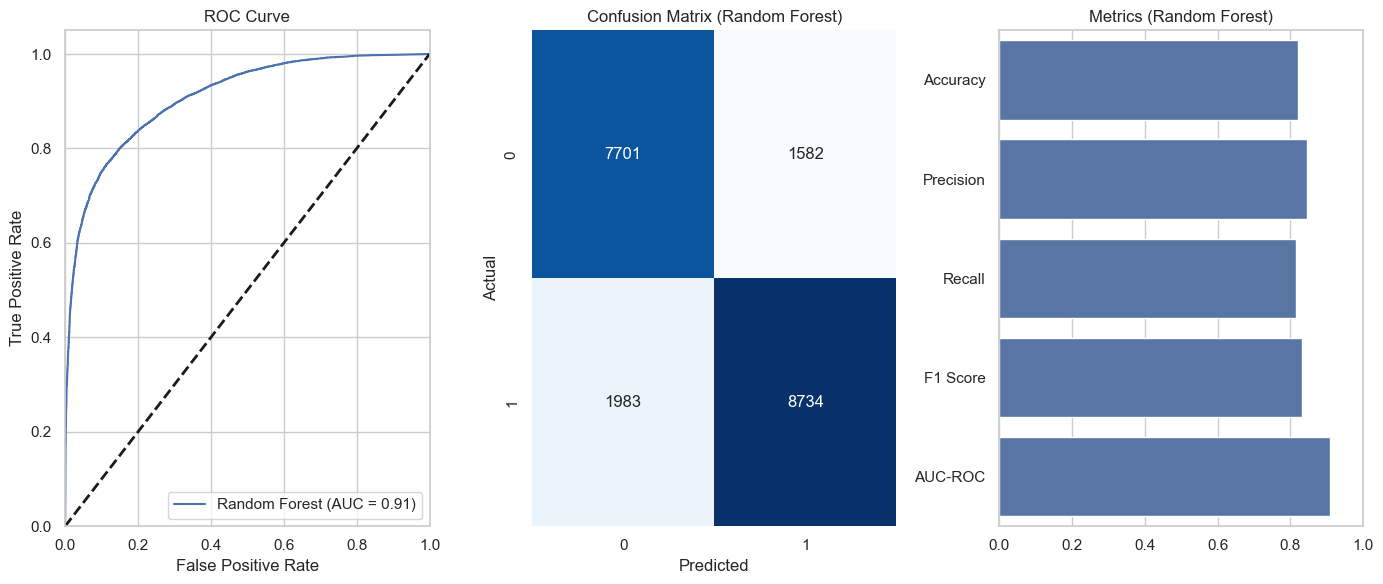

['../Models/best_rf_model_PCA.pkl']

In [569]:
# Balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the hyperparameter space for Random Forest
param_distributions = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]  # Removed 'auto' and added None if you want to try it
}

# Create the base model
rf = RandomForestClassifier(random_state=42)

# Set up the random search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,  # You can adjust the number of iterations
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Train the random search with resampled data
random_search.fit(X_train_resampled, y_train_resampled)

# Best model found
best_rf = random_search.best_estimator_

# Evaluate the optimized model
y_pred_best_rf = best_rf.predict(X_test)
y_prob_best_rf = best_rf.predict_proba(X_test)[:, 1]

print_metrics(y_test, y_pred_best_rf, y_prob_best_rf, "Optimized Random Forest with SMOTE")


# Graficar métricas para Random Forest
plot_metrics(y_test, y_pred_best_rf, y_prob_best_rf, "Random Forest")
# Save the optimized model
joblib.dump(best_rf, '../Models/best_rf_model_PCA.pkl')


MODEL SELECTED

## Second model with RF
- metrics accuracy 80%

---
---

# 3rd MODEL

In [253]:
df_short_train['condition'] = df_short_train['condition'].map({'new': 1, 'used': 0})

df_short_train['condition'] = df_short_train['condition'].astype(int)

# Separate the target variable and the predictor variables
y = df_short_train['condition']
X = df_short_train.drop('condition', axis=1)

# Replace infinite values with NaN and then impute or remove them
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.fillna(0)  # You can choose to impute with 0 or the column's mean

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of features to select (adjust according to your needs)
num_features = 100  # For example, we will select the top 100 features

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif, k=num_features)),
    ('classifier', LogisticRegression(penalty='l1', solver='saga', max_iter=1000, n_jobs=-1))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

import pickle

# Save the model
with open('../Models/modelo_entrenado1.pkl', 'wb') as file:
    pickle.dump(pipeline, file)


c:\Users\joanm\OneDrive\Escritorio\University\6\ETL\ML_activities\model_training\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=100 is greater than n_features=15. All the features will be returned.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.62      0.93      0.74     13838
           1       0.89      0.51      0.65     16162

    accuracy                           0.70     30000
   macro avg       0.75      0.72      0.69     30000
weighted avg       0.76      0.70      0.69     30000



c:\Users\joanm\OneDrive\Escritorio\University\6\ETL\ML_activities\model_training\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [167]:
df_short_train['condition'] = df_short_train['condition'].map({'new': 1, 'used': 0})

df_short_train['condition'] = df_short_train['condition'].astype(int)

# Separate the target variable and the predictor variables
y = df_short_train['condition']
X = df_short_train.drop('condition', axis=1)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Encode categorical variables using One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights to handle class imbalances
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(zip(np.unique(y_train), class_weights))

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif)),
    ('classifier', LogisticRegression(
        penalty='l1',
        solver='saga',
        max_iter=1000,
        n_jobs=-1,
        class_weight=class_weights
    ))
])

param_grid = {
    'feature_selection__k': [50, 100, 'all'],  
    'classifier__C': [0.01, 0.1, 1, 10],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found:", grid_search.best_params_)

# Make predictions
y_pred = grid_search.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Get selected features
selected_features_indices = grid_search.best_estimator_.named_steps['feature_selection'].get_support(indices=True)
selected_features = X.columns[selected_features_indices]
print("Selected features:")
print(selected_features)

# Save the model
with open('../Models/modelo_entrenado2.pkl', 'wb') as file:
    pickle.dump(pipeline, file)


Valores únicos en 'condition' antes del mapeo:
['new' 'used']
Número de muestras después del mapeo y eliminación de NaN:
100000


c:\Users\joanm\OneDrive\Escritorio\University\6\ETL\ML_activities\model_training\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=50 is greater than n_features=15. All the features will be returned.
  warnings.warn(


Mejores parámetros encontrados: {'classifier__C': 10, 'feature_selection__k': 50}
              precision    recall  f1-score   support

           0       0.57      0.95      0.71      9283
           1       0.90      0.37      0.53     10717

    accuracy                           0.64     20000
   macro avg       0.74      0.66      0.62     20000
weighted avg       0.75      0.64      0.61     20000

Características seleccionadas:
Index(['price', 'initial_quantity', 'sold_quantity', 'available_quantity',
       'accepts_mercadopago_False', 'accepts_mercadopago_True',
       'buying_mode_auction', 'buying_mode_buy_it_now',
       'buying_mode_classified', 'automatic_relist_False',
       'automatic_relist_True', 'status_active', 'status_closed',
       'status_not_yet_active', 'status_paused'],
      dtype='object')


c:\Users\joanm\OneDrive\Escritorio\University\6\ETL\ML_activities\model_training\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [255]:
df_short_train['condition'] = df_short_train['condition'].map({'new': 1, 'used': 0})

# Separate the target variable and the predictor variables
y = df_short_train['condition']
X = df_short_train.drop('condition', axis=1)

# Replace infinite values with NaN and then impute or remove them
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)  # You can choose to impute with 0 or the column's mean

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Number of features to select (adjust according to your needs)
num_features = 100  # For example, we will select the top 100 features

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif, k=num_features)),
    ('classifier', LogisticRegression(
        penalty='l1', solver='saga', max_iter=1000, n_jobs=-1
    ))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Save the model
with open('../Models/modelo_entrenado3.pkl', 'wb') as file:
    pickle.dump(pipeline, file)



c:\Users\joanm\OneDrive\Escritorio\University\6\ETL\ML_activities\model_training\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=100 is greater than n_features=15. All the features will be returned.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.62      0.93      0.74     13838
           1       0.89      0.51      0.65     16162

    accuracy                           0.70     30000
   macro avg       0.75      0.72      0.69     30000
weighted avg       0.76      0.70      0.69     30000



c:\Users\joanm\OneDrive\Escritorio\University\6\ETL\ML_activities\model_training\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### The last models aren't used they have less performance than the others